<a href="https://colab.research.google.com/github/manideepak27/C.V.unit5/blob/main/Road_Lane_and_Vehicle_Detection_using_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python opencv-contrib-python imutils


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Frame 0


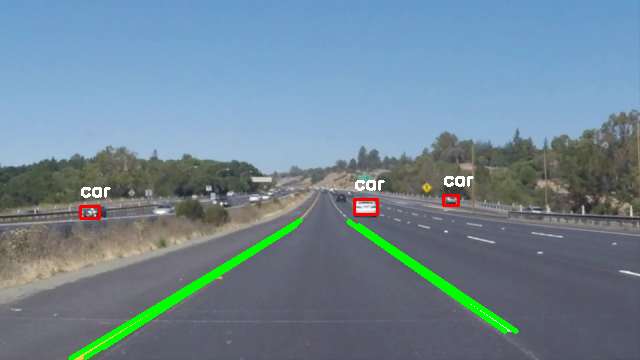

Frame 30


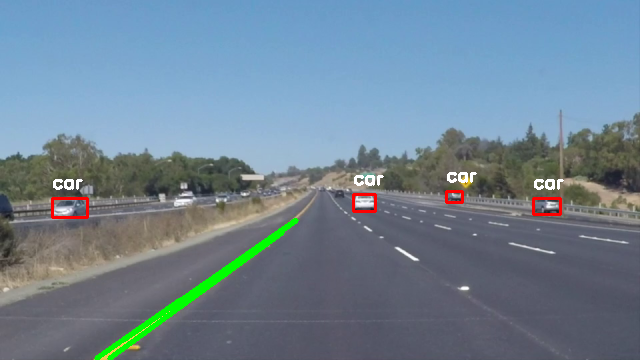

Frame 60


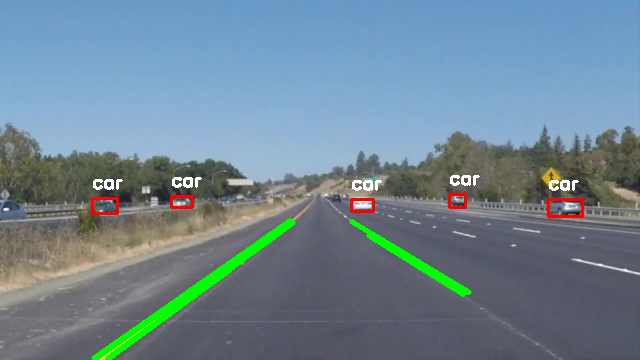

Frame 90


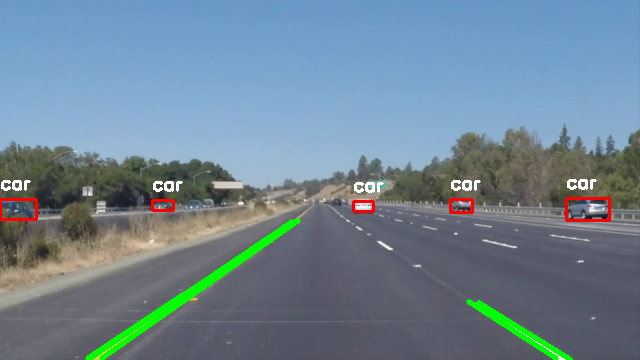

Frame 120


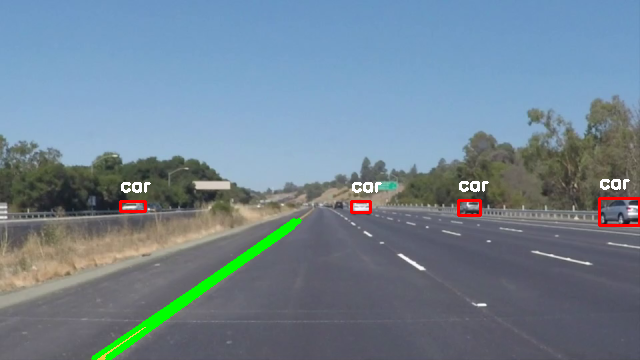

Frame 150


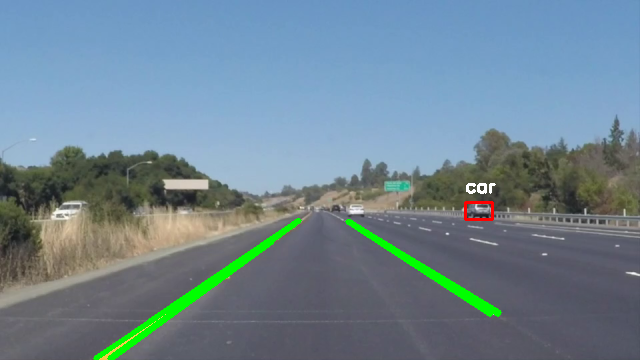

Frame 180


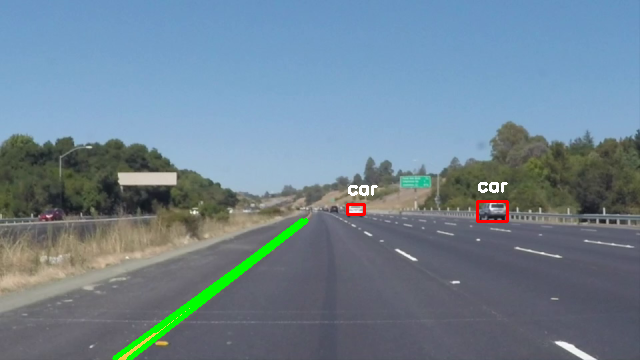

Frame 210


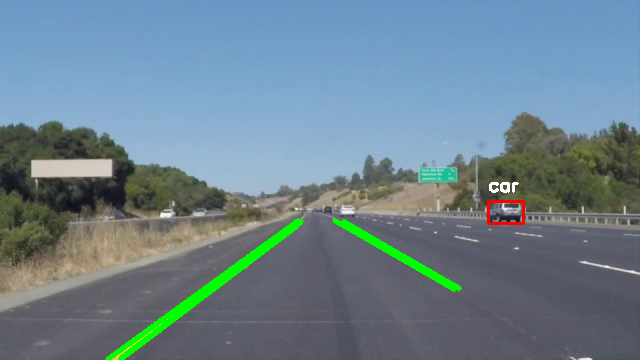

Frame 240


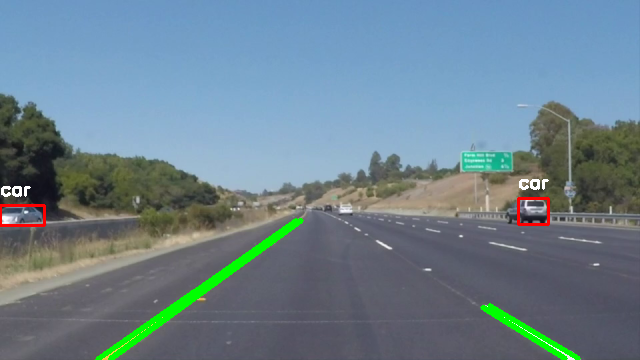

Frame 270


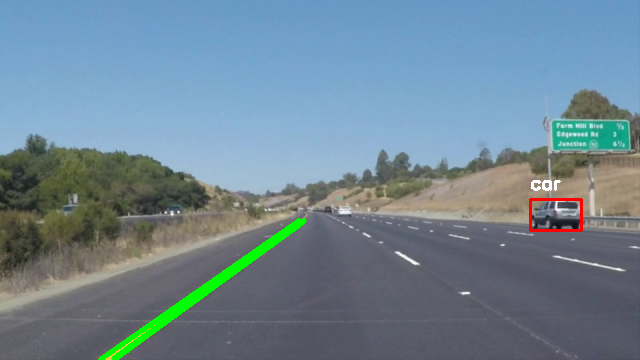

Frame 300


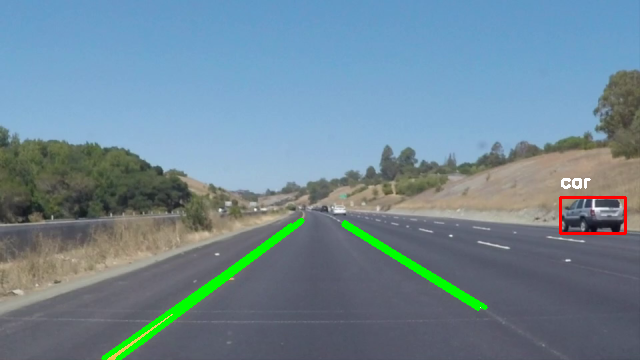

Frame 330


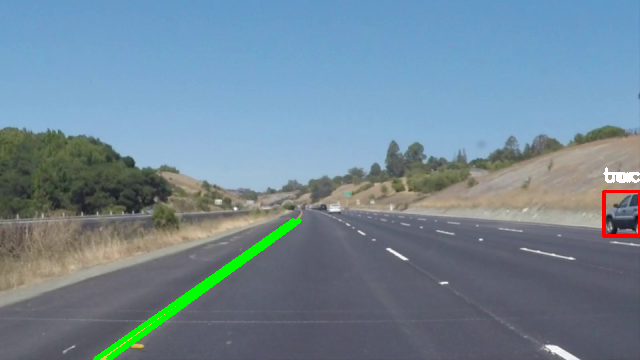

Frame 360


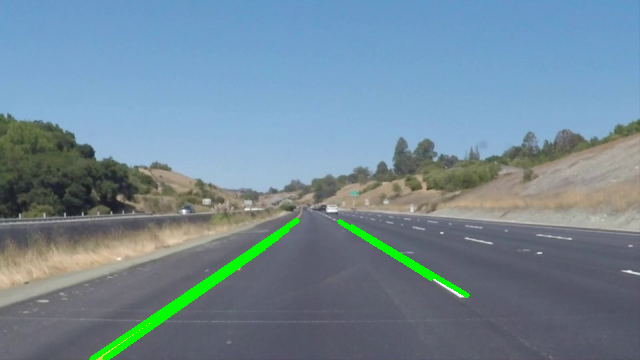

Frame 390


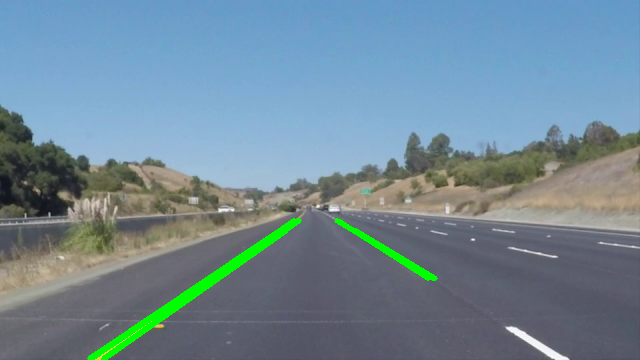

Frame 420


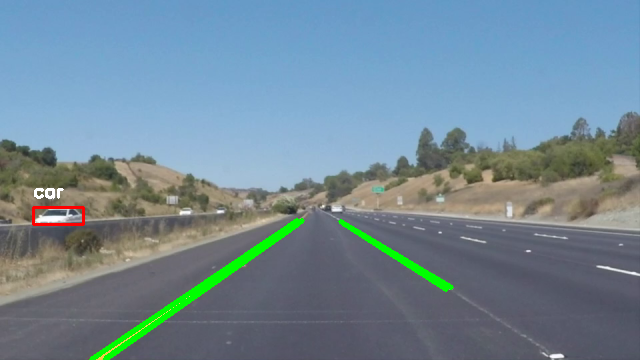

Frame 450


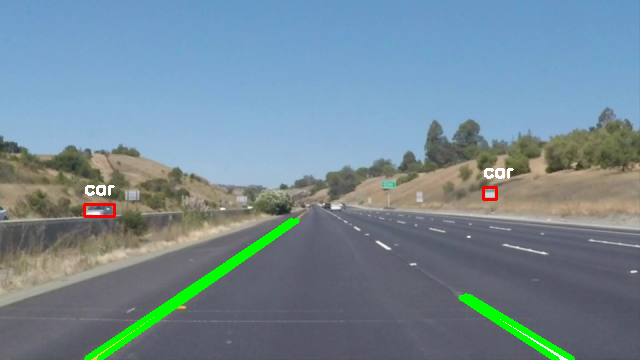

Frame 480


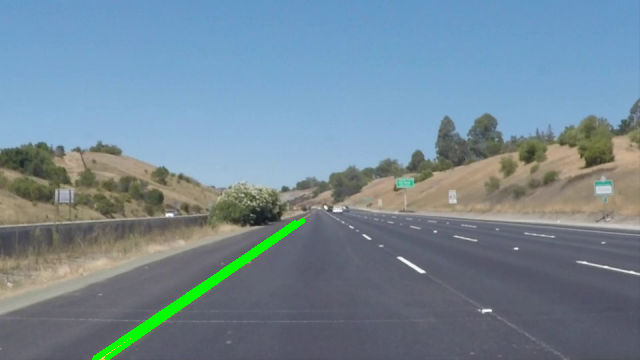

Frame 510


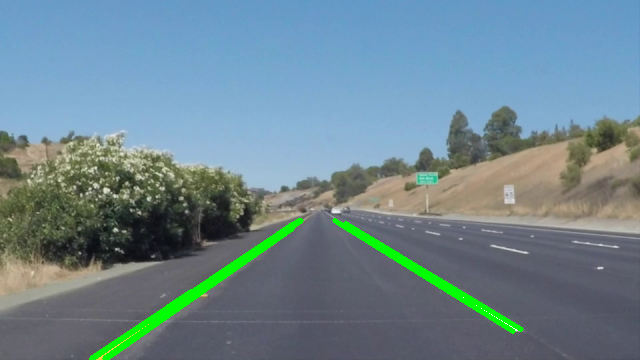

Frame 540


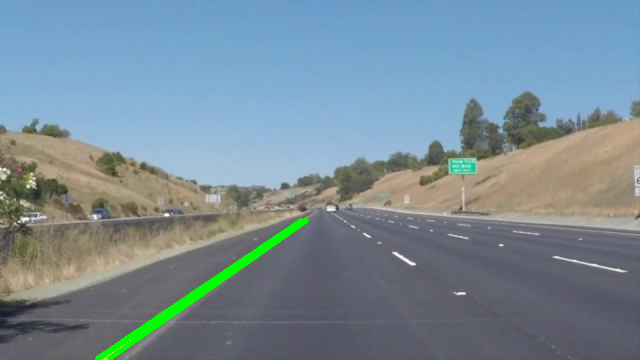

Frame 570


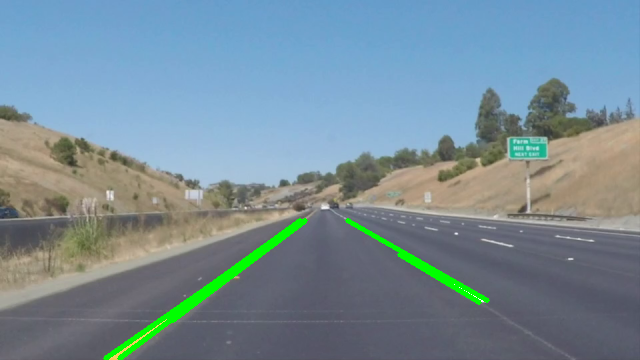

Frame 600


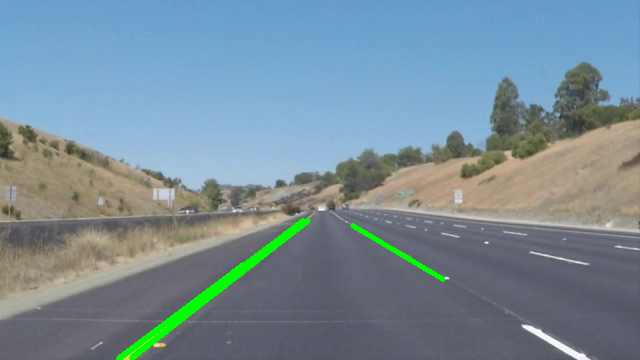

Frame 630


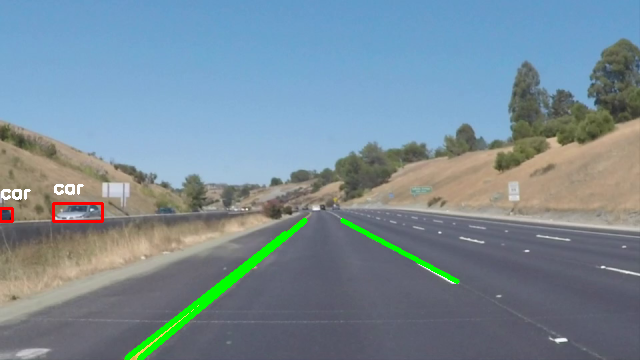

Frame 660


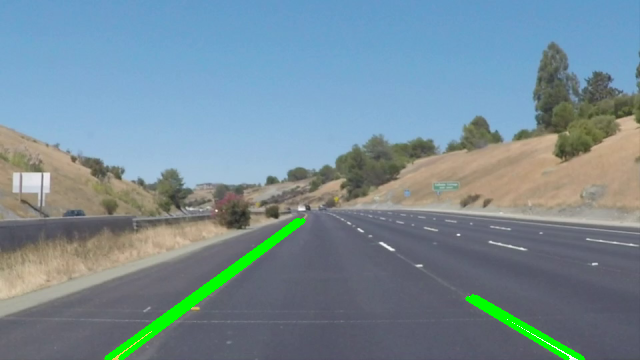

✅ Detection complete. Downloading result...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
!pip install ultralytics opencv-python imutils

from ultralytics import YOLO
import cv2
import numpy as np
import imutils
from google.colab.patches import cv2_imshow
from google.colab import files

# Download a sample road video (Udacity)
!wget -q https://github.com/udacity/CarND-LaneLines-P1/raw/master/test_videos/solidYellowLeft.mp4 -O road.mp4

# Load YOLOv8 pretrained model
model = YOLO("yolov8n.pt")  # nano model = fast, accurate enough

# Open the video
cap = cv2.VideoCapture("road.mp4")

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("output_yolo.mp4", fourcc, 20.0, (640, 360))

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = imutils.resize(frame, width=640)
    height, width = frame.shape[:2]

    # ---- Lane Detection ----
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 150)

    mask = np.zeros_like(edges)
    polygon = np.array([[
        (50, height), (width-50, height),
        (width//2 + 60, height//2 + 40),
        (width//2 - 60, height//2 + 40)
    ]], np.int32)
    cv2.fillPoly(mask, polygon, 255)
    roi = cv2.bitwise_and(edges, mask)

    lines = cv2.HoughLinesP(roi, 1, np.pi/180, threshold=50, minLineLength=80, maxLineGap=40)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

    # ---- YOLOv8 Vehicle Detection ----
    results = model.predict(frame, verbose=False)
    for r in results:
        for box in r.boxes:
            cls = int(box.cls)
            label = model.names[cls]
            if label in ["car", "truck", "bus", "motorbike"]:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
                cv2.putText(frame, label, (x1, y1-10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

    # Save video
    out.write(frame)

    # Show every 30th frame
    if frame_count % 30 == 0:
        print(f"Frame {frame_count}")
        cv2_imshow(frame)
    frame_count += 1

cap.release()
out.release()
cv2.destroyAllWindows()

print("✅ Detection complete. Downloading result...")
files.download("output_yolo.mp4")


In [6]:
!wget https://github.com/udacity/CarND-LaneLines-P1/raw/master/test_videos/solidYellowLeft.mp4 -O road.mp4


--2025-10-30 04:08:56--  https://github.com/udacity/CarND-LaneLines-P1/raw/master/test_videos/solidYellowLeft.mp4
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/udacity/CarND-LaneLines-P1/master/test_videos/solidYellowLeft.mp4 [following]
--2025-10-30 04:08:56--  https://raw.githubusercontent.com/udacity/CarND-LaneLines-P1/master/test_videos/solidYellowLeft.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8008635 (7.6M) [application/octet-stream]
Saving to: ‘road.mp4’

road.mp4            100%[===================>]   7.64M  --.-KB/s    in 0.04s   

2025-10-30 04:08:56 (205 MB/s) - ‘road.mp4’